In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [77]:
df=pd.read_csv(r'C:\Users\Gaurav Kumar\Desktop\DATA TRAINED\Internship\medical_cost_insurance.csv')

In [78]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [80]:
#there are  few categorical fetures sex,smoker and region 
#now lets descrive the integer data

In [81]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [82]:
#check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [83]:
# since there is no data missing we shall go for EDA

C:\Users\Gaurav Kumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

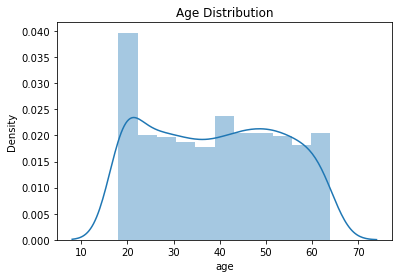

In [84]:
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show

In [85]:
# we can see at the age group of 20 to 23 it has a high density,whereas rest age group has constant numbers

male      676
female    662
Name: sex, dtype: int64

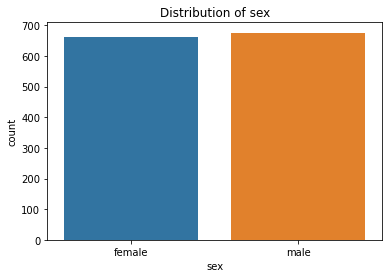

In [86]:
sns.countplot( x='sex',data=df)
plt.title('Distribution of sex')
plt.show
df['sex'].value_counts()


In [87]:
# Male Female  distribution is evenly poised

C:\Users\Gaurav Kumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


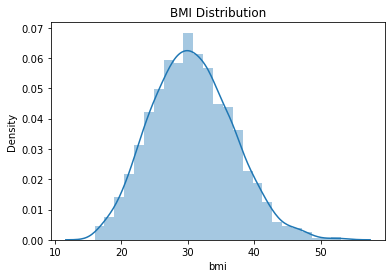

In [88]:
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

In [89]:
# This kind of distribution is normal distribution. 
# The figure shows that we have an gradual increase from 15 to reach the peak values of 30. 
# Then there is a gradual decrease. We may also notice very few outliers and we will take care of them later.
# According to the research, Normal BMI range is 18.5 to 24.9. 
# A person exceeding the limit is overweight and the person below this limit is underweight.
# We could see that there are more number of people in this dataset that are overweight!

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

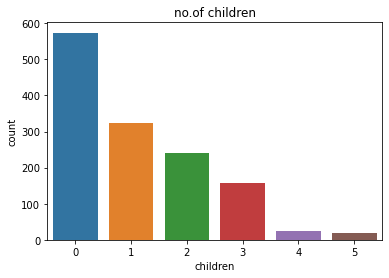

In [90]:
sns.countplot( x='children',data=df)
plt.title('no.of children')
plt.show
df['children'].value_counts()

In [91]:
# as the nos of childre increase the count of insured people decreases

no     1064
yes     274
Name: smoker, dtype: int64

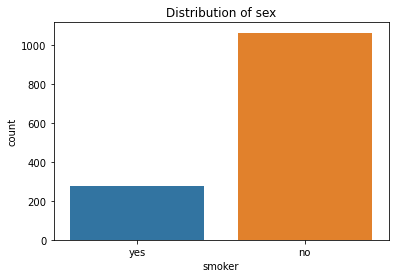

In [92]:
sns.countplot( x='smoker',data=df)
plt.title('Distribution of sex')
plt.show
df['smoker'].value_counts()

In [93]:
# the nos of smoker is higher thn non smoker

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

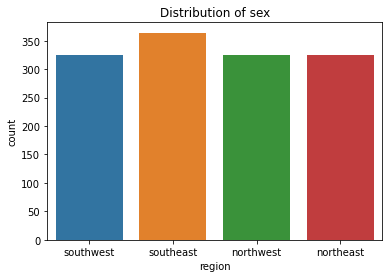

In [94]:
sns.countplot( x='region',data=df)
plt.title('Distribution of sex')
plt.show
df['region'].value_counts()

In [95]:
# The nos of people insured are evenly distributed region wise

C:\Users\Gaurav Kumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

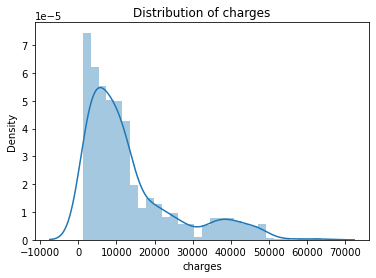

In [96]:
sns.distplot(df['charges'])
plt.title('Distribution of charges')
plt.show

In [97]:
# Data Pre processing
# encoding categorical features

In [98]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [99]:
#split the data into features and column

X=df.drop(columns='charges',axis=1)
y=df['charges']

In [100]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [101]:
#Train and Test Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [102]:
#model training
lr=LinearRegression()

In [103]:
lr.fit(X_train,y_train)

LinearRegression()

In [104]:
# model evaluation
X_predict= lr.predict(X_train)
X_test_predict=lr.predict(X_test)

In [105]:
# R squared value
r2_score=metrics.r2_score(y_train,X_predict)
print('r2score :',r2_score)

r2score : 0.7574340926271486


In [106]:
#prediction on testing data
r2_score_test=metrics.r2_score(y_test,X_test_predict)
print('test r2score:',r2_score_test)

test r2score: 0.7318630535235594


In [107]:
#now input a sample data
input_data=(46,1,33.44,1,1,0)
#now convert it into array
input_data=np.asarray(input_data)

#reshape the array
input_data_reshape=input_data.reshape(1,-1)

predict=lr.predict(input_data_reshape)
print(predict)

[10845.05538789]


C:\Users\Gaurav Kumar\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
